In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import sys

sys.path.append('../src')

from Config.config import PATHS

import warnings
warnings.filterwarnings("ignore")

### Test focal region similarity

In [26]:
from Classes.focal_regions import FocalRegion

In [27]:
region = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 1]])
fra = FocalRegion(region)
fra.debug = True
print('Focal region:')
print(fra)

# history = np.array([[1, 0], [0, 1], [0, 1]])
history = np.array([[0], [1], [1]])
print('History:\n', history)
print('-'*60)
fra.get_action_preferences(history, 0)

Focal region:
------------------------------------------------------------
[[1 0 1]
 [1 1 0]
 [0 1 1]]
------------------------------------------------------------
History:
 [[0]
 [1]
 [1]]
------------------------------------------------------------
	Cicle from column 0:
[[1]
 [1]
 [0]]
	Similarity score: 0.3333333333333333
------------------------------------------------------------
	Cicle from column 1:
[[0]
 [1]
 [1]]
	Similarity score: 1.0
------------------------------------------------------------
	Cicle from column 2:
[[1]
 [0]
 [1]]
	Similarity score: 0.3333333333333333
------------------------------------------------------------
------------------------------------------------------------
Scores: [np.float64(0.3333333333333333), np.float64(1.0), np.float64(0.3333333333333333)]
Finding preferences for player 0 according to region
Pattern at column 0 assigns similarity 0.3333333333333333 to action=no-go
	Raw preferences: [0.33333333 0.66666667]
	Logistic preferences: [0.0159317

array([0.34333702, 1.34333702])

<Axes: >

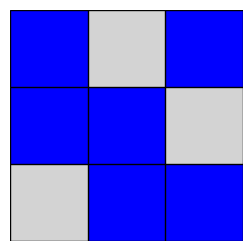

In [28]:
file_name = Path('..', 'LaTeX', 'FRA_region_1.png')
FocalRegion.draw_region(region, file=file_name)

<Axes: >

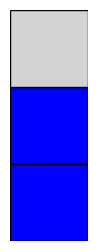

In [29]:
file_name = Path('..', 'LaTeX', 'history_2.png')
FocalRegion.draw_region(history, file=file_name)

### Test Focal Regions

In [30]:
from Classes.focal_regions import SetFocalRegions

In [31]:
sfr = SetFocalRegions(
    num_agents=3,
    threshold=0.7,
    len_history=2,
    c=0.9,
    steepness=20,
    max_regions=4,
)
sfr.generate_focal_regions()
print(sfr)

Region 0
------------------------------------------------------------
[[0. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]]
------------------------------------------------------------
Region 1
------------------------------------------------------------
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
------------------------------------------------------------
Region 2
------------------------------------------------------------
[[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]]
------------------------------------------------------------
Region 3
------------------------------------------------------------
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]
------------------------------------------------------------



In [32]:
history = np.array([1, 0, 0])
sfr.add_history(history)
history = np.array([0, 1, 1])
sfr.add_history(history)
print('History')
print(sfr.history)
sfr.debug = True
for region in sfr.focal_regions:
    region.debug = True
sfr.get_action_preferences(agent_id=0)

History
[[1 0]
 [0 1]
 [0 1]]
Considering preferences from the viewpoint of agent 0
------------------------------------------------------------
	Cicle from column 0:
[[0. 1.]
 [1. 1.]
 [1. 0.]]
	Similarity score: 0.16666666666666666
------------------------------------------------------------
	Cicle from column 1:
[[1. 1.]
 [1. 0.]
 [0. 1.]]
	Similarity score: 0.5
------------------------------------------------------------
	Cicle from column 2:
[[1. 0.]
 [0. 1.]
 [1. 1.]]
	Similarity score: 0.8333333333333334
------------------------------------------------------------
------------------------------------------------------------
Scores: [np.float64(0.16666666666666666), np.float64(0.5), np.float64(0.8333333333333334)]
Finding preferences for player 0 according to region
Pattern at column 0 assigns similarity 0.16666666666666666 to action=go
	Raw preferences: [0.83333333 0.16666667]
	Logistic preferences: [2.36840608e-01 4.67407233e-07]
Pattern at column 1 assigns similarity 0.5 to ac

array([0.5, 0.5])

In [33]:
sfr.normalized_logistic(np.array([0.83, 0.17]))

array([2.24587598e-01, 5.00821889e-07])

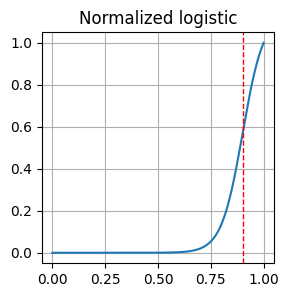

In [34]:
X = np.linspace(0, 1, 1000)
Y = sfr.normalized_logistic(X)

fig, ax = plt.subplots(1, 1, figsize=(3,3))
sns.lineplot(x=X, y=Y, ax=ax)
ax.axvline(x=sfr.c, color='red', linestyle='--', linewidth=1)
ax.set_title(f'Normalized logistic')
ax.grid()

fig.savefig(PATHS['LaTeX'] / 'logistic.png', dpi=300)

### Test FRA agents

In [35]:
from Classes.bar import Bar
from Utils.interaction import Episode
from Classes.focal_regions import SetFocalRegions
from Classes.cognitive_model_agents import FocalRegionAgent

In [36]:
free_parameters = {
    'inverse_temperature': 6,
    'len_history': 2,
}
fixed_parameters = {
    'num_agents': 2,
    'threshold': 0.5,
}
n = 1

<Axes: >

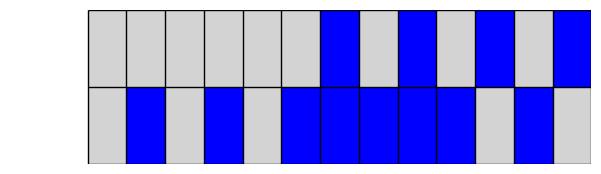

In [37]:
# Create the environment
bar = Bar(
    num_agents=fixed_parameters['num_agents'],
    threshold=fixed_parameters['threshold']
)
# Create the agents
agents = [
    FocalRegionAgent(
        free_parameters, 
        fixed_parameters, 
        n
    ) for n in range(fixed_parameters['num_agents'])
]
# Create the episode
episode = Episode(
    model='FRA',
    agents=agents,
    environment=bar,
    num_rounds=13
)

episode.run()

bar.render()

# Test simulations

In [ ]:
from Utils.interaction import Performer
from Utils.utils import GetMeasurements
from Classes.cognitive_model_agents import FRAplus

In [39]:
fixed_parameters = {
	"num_agents":2,
	"threshold":0.5,
}
free_parameters = {
    'inverse_temperature': 6, 
    'bias': 0.75, 
    'learning_rate': 0.2, 
    'len_history': 2, 
    'delta': 0.4
}
simulation_parameters = {
	'num_rounds': 50,
    'num_episodes': 23,
	'verbose':False
}

  0%|          | 0/23 [00:00<?, ?it/s]

(-0.05, 0.55)

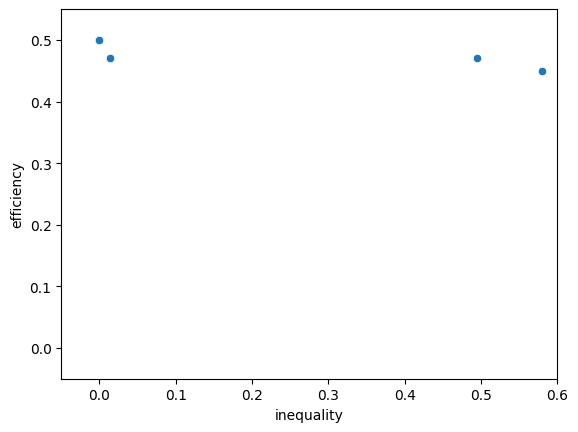

In [40]:
df = Performer.sim(
    agent_class=FocalRegionAgent,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters
)
gm = GetMeasurements(
    data=df, measures=['efficiency', 'inequality']
)
data = gm.get_measurements()
ax = sns.scatterplot(
    x='inequality', y='efficiency',
    data=data
)
ax.set_xlim([-0.05, 0.6])
ax.set_ylim([-0.05, .55])

<Axes: xlabel='round', ylabel='score'>

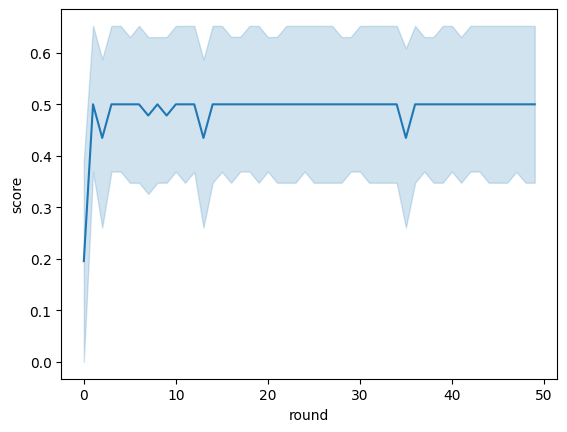

In [41]:
sns.lineplot(
    x='round', y='score',
    data=df
)

# Test parameter fit

In [ ]:
from Classes.cognitive_model_agents import FRAplus
from Classes.parameter_recovery import ParameterFit

In [ ]:
# my_models = [FocalRegionAgent]
my_models = [FRAplus]

best_fit_file_2P = PATHS['parameter_fit_results'] / 'best_fit_2P_3.json'

#Load 2P data
file = PATHS['human_data'] / '2-player-UR.csv'
print(f'Loading data from {file}...')
data = pd.read_csv(file)
data.head(2)

Loading data from /Users/edgar/Documents/GitHub/Cognitive_Models_El_Farol_Bar_Problem/data/human/2-player-UR.csv...


,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision
0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0
1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1


In [44]:
hyperparameters = {
    'n_iter': 128,
    'init_points': 64,
}

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='bayesian',
    hyperparameters=hyperparameters,
    new_file=False
)

Fitting models...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...
|   iter    |  target   | invers... |   bias    | learni... | len_hi... |     c     |   delta   |
-------------------------------------------------------------------------------------------------
| 1         | -3171.614 | 27.272386 | 0.7203244 | 0.0001143 | 1.6046651 | 0.5733779 | 0.0092338 |
| 2         | -4454.435 | 12.734393 | 0.3455607 | 0.3967674 | 2.0776334 | 0.7095972 | 0.0685219 |
| 3         | -2219.046 | 13.880491 | 0.8781174 | 0.0273875 | 2.3409350 | 0.7086524 | 0.0558689 |
| 4         | -6895.387 | 9.8443771 | 0.1981014 | 0.8007445 | 2.9365231 | 0.6567120 | 0.0692322 |
| 5         | -4014.304 | 56.212516 | 0.8946066 | 0.0850442 | 1.0781095 | 0.5849152 | 0.0878142 |
| 6         | -4456.585 | 7.1958505 | 0.4211076 | 0.9578895 | 2.0663305 | 0.8459385 | 0.0315515 |
| 7         | -3131.948 | 44.249558 | 0.8346256 | 0.0182882

In [45]:
ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='scipy',
    hyperparameters={},
    new_file=False
)

Fitting models...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...
Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(5.939632216877658), 'bias': np.float64(0.790865723560385), 'learning_rate': np.float64(0.18051230480334346), 'len_history': np.float64(2.8265064258992583), 'c': np.float64(0.8006637357861819), 'delta': np.float64(0.1)}
Deviance: -2181.1225488549694
AIC: 4374.245097709939
--------------------------------------------------


{'inverse_temperature': np.float64(5.939793200426039), 'bias': np.float64(0.7908615558239465), 'learning_rate': np.float64(0.18051110357718222), 'len_history': np.float64(2.4724091615619512), 'c': np.float64(1.0), 'delta': np.float64(0.1)}
Deviance: -2181.1293794903972
AIC: 4374.2587589807945

In [ ]:
from Classes.parameter_recovery import GetDeviance

free_parameters = {
    'inverse_temperature': 6, 
    'bias': 0.79, 
    'learning_rate': 0.18, 
    'len_history': 2, 
    'c': 0.1, 
    'delta': 0.1
}
g_dev = GetDeviance(
    model=FRAplus,
    free_parameters=free_parameters,
    data=data
)

g_dev.get_deviance_from_data(free_parameters)

np.float64(2226.7871212191335)

---